
<hr>
<h2> Máquinas de Aprendizaje - Tarea 1 </h2>
<h4> 
    Adrien Juraver  - Diego Pérez
</h4>
<hr>


Las primeras tres secciones de la tarea requiren de los siguientes módulos de Python.

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
import sklearn.linear_model as lm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

### 1) Regresión Lineal Ordinaria

En las primeras tres secciones se trabajará con el dataset <em>House Sales in King County, USA</em>, donde los predictores son distintas características de las casas en venta, y el regresor son los precios de venta. El objetivo es lograr predecir el precio de venta de las casas, en base a sus características. El primer modelo es la regresión lineal ordinaria (OLS). 

#### a) Construir el dataset

In [2]:
df = pd.read_csv("kc_house_data.csv", sep=",", header = 0)
df = df.drop(['id','date','zipcode'], axis=1)

#### b) Describir el dataset

In [3]:
print("# entries  = ", df.shape[0], "\n# features = ", df.shape[1], "\n")
df.info()
df.describe()

# entries  =  21613 
# features =  18 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Se puede observar que las casas se describen en 18 características o <em>features</em>, las cuales no están normalizadas. El dataset se compone en total de 21.613 entradas, las que serán divididas en datos de entrenamiento y pruebas a continuación.

#### c) Normalizar y dividir el dataset

En primera instancia, se divide el dataset en conjuntos de entrenamiento y de pruebas, con un 70% y 30% de las entradas correspondientemente. El precio de venta de las casas corresponde a la variable dependiente del modelo lineal, por lo que se separa del conjunto original. Finalmente, se obtienen cuatro conjuntos, X_train, X_test, y_train e y_test.

In [4]:
y = np.log(df['price'])
X = df
X = X.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 17) (6484, 17) (15129,) (6484,)


Con el dataset dividido, se procede a normalizar el conjunto de pruebas. Este paso es importante al utilizar estimadores, ya que si una variable es ordenes de magnitud mayor a las demás, dominará la función objetivo, dificultando el aprendizaje sobre las otras variables. Los estimadores pueden comportarse de mala forma si las características individuales no se parecen en alguna medida a datos distribuidos normalmente (Gaussiana con media 0 y varianza unitaria). También existen elementos en algunos estimadores, como los regularizadores L1 o L2, que asumen la normalidad de los datos, ya que son sensibles a la escala de las variables.

In [5]:
scaler = StandardScaler().fit(X_train)
scaled_x_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaled_x_train.insert(scaled_x_train.shape[1], 'intercept', np.ones(scaled_x_train.shape[0]))

#### d) OLS

Se utiliza la implementación de Scikit-learn para la regresión por mínimos cuadrados, la cual permite estimar o no el intercepto mediante el argumento <em>fit_intercept</em>. A  continuación se implementa de ambas formas, primero agregando manualmente el intercepto al conjunto normalizado de variables X, y luego permitiendo que la implementación se encargue. 

In [6]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(scaled_x_train, y_train)
print("OLS Train Set R^2 = ",linreg.score(scaled_x_train, y_train))
print("Intercept = ", linreg.coef_[-1])

OLS Train Set R^2 =  0.766707394981
Intercept =  13.0462545215


In [7]:
linreg2 = lm.LinearRegression().fit(scaler.transform(X_train), y_train)
print("OLS Train Set R^2 = ", linreg2.score(scaler.transform(X_train), y_train))
print("Intercept = ", linreg2.intercept_)

OLS Train Set R^2 =  0.766707394981
Intercept =  13.0462545215


Como se puede observar, ambas formas son equivalentes. La ventaja de la versión manual, es que el intercepto se encuentra disponible en el arreglo de coeficientes del modelo, y no por separado.

#### e) Pesos y Z-score

Los pesos corresponden a los coeficientes del modelo linear, que se encuentran disponibles en forma de arreglo. Los Z-score se calculan como

<center>$z_i = \frac{\beta_i}{\sigma \sqrt{\left(X^T X\right)^{-1}_{jj}}}$</center>

In [8]:
x = scaled_x_train.as_matrix()
n, m = x.shape # n = # of observations , m = # of features + 1 (intercept)
y_hat = linreg.predict(x)
MSE = np.sum((y_hat - y_train.values)**2)/(n - m)
std_err = np.sqrt(MSE * np.diag(np.linalg.pinv(np.dot(x.T,x)))) # s^2 = o*(X^T*X)^-1
z_scores = linreg.coef_/std_err # z = B/std_err
table = pd.DataFrame(np.column_stack((scaled_x_train.columns, linreg.coef_, std_err, z_scores)), columns=['Variable', 'Coefficient', 'Std Error', 'Z-score'])
table

,Variable,Coefficient,Std Error,Z-score
0,bedrooms,-0.0100088,0.00262515,-3.81266
1,bathrooms,0.0560766,0.00373714,15.0052
2,sqft_living,0.0678621,0.00239037,28.3898
3,sqft_lot,0.0185355,0.00294765,6.28823
4,floors,0.0386352,0.0029224,13.2204
5,waterfront,0.0342985,0.00226413,15.1486
6,view,0.0421344,0.00244643,17.2228
7,condition,0.0454113,0.00229339,19.8009
8,grade,0.183349,0.00379291,48.34
9,sqft_above,0.0571877,0.00254611,22.4608


Los Z-score no indican que exista algun problema con los coeficientes. Si bien algunos tienen magnitudes cercanas a 1.96, en ningún caso se cumple $z_i < 1.96$, por lo que la hipótesis nula se rechaza para todos los coeficientes. 

Se observan atributos que claramente aportan más información al modelo como grade, yr_built y lat, y otros de los que el modelo probablemente puede precindir, pero como ninguno aceptó la hipótesis nula, se mantienen todos los atributos.

#### f) Validación Cruzada

Se valida el modelo primero con el conjunto de pruebas y luego con validación cruzada de 5 y 10 <em>folds</em>. La métrica de error es el MSE.

In [9]:
scaled_x_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
scaled_x_test.insert(scaled_x_test.shape[1], 'intercept', np.ones(scaled_x_test.shape[0]))
yhat_train = linreg.predict(scaled_x_train)
yhat_test = linreg.predict(scaled_x_test)
mse_train = np.mean(np.power(yhat_train - y_train, 2))
mse_test = np.mean(np.power(yhat_test - y_test, 2))
print("MSE OLS Train Set = ", mse_train)
print("MSE OLS Test Set = ", mse_test)

MSE OLS Train Set =  0.06407938457969116
MSE OLS Test Set =  0.06529586604280457


In [10]:
Xm = X_train.as_matrix()
ym = y_train.as_matrix()
n_folds = 5
kf = KFold(n_splits=n_folds)
mse_cv = 0
for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=X_train.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]), columns=X_train.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    y_hat_val = linreg.predict(df_cross_test)
    mse_fold = np.mean(np.power(y_hat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv/n_folds
print("MSE OLS 5-fold CV = ", mse_cv)

MSE OLS 5-fold CV =  0.0643336242044


In [11]:
n_folds = 10
kf = KFold(n_splits=n_folds)
mse_cv = 0
for train, val in kf.split(Xm):
    cross_scaler = StandardScaler().fit(Xm[train])
    df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]), columns=X_train.columns)
    df_cross_train.insert(df_cross_train.shape[1], 'intercept', np.ones(df_cross_train.shape[0]))
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(df_cross_train, ym[train])
    df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[val]), columns=X_train.columns)
    df_cross_test.insert(df_cross_test.shape[1], 'intercept', np.ones(df_cross_test.shape[0]))
    y_hat_val = linreg.predict(df_cross_test)
    mse_fold = np.mean(np.power(y_hat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv/n_folds
print("MSE OLS 10-fold CV = ", mse_cv)

MSE OLS 5-fold CV =  0.064297008432


Los tres resultados son muy similares, con validación cruzada obteniendo errores marginalmente menores. La diferencia es que en el primer caso, se utilizó el conjunto completo de entrenamiento y se validó con el conjunto de pruebas, y en el segundo caso se entrenó y validó solo con el conjunto de entrenamiento. La ventaja es evidente cuando no hay suficientes datos disponibles como para dividirlos en conjuntos de entrenamiento y pruebas, sin tener pérdidas significativas de desempeño.

En este dataset particular, se puede decir que las distintas particiones del conjunto de entrenamiento corresponden a una muestra representativa del conjunto completo de entrenamiento, algo que rara vez ocurre en problemas de este tipo.

#### j) Q-Q Plot

Se utiliza el modulo <em>stats</em> de <em>Scipy</em> para visualizar el gráfico Q-Q. El objetivo es probar la hipótesis de normalidad, por lo que en el eje x se encuentran los cuantiles de la población normal estándar.

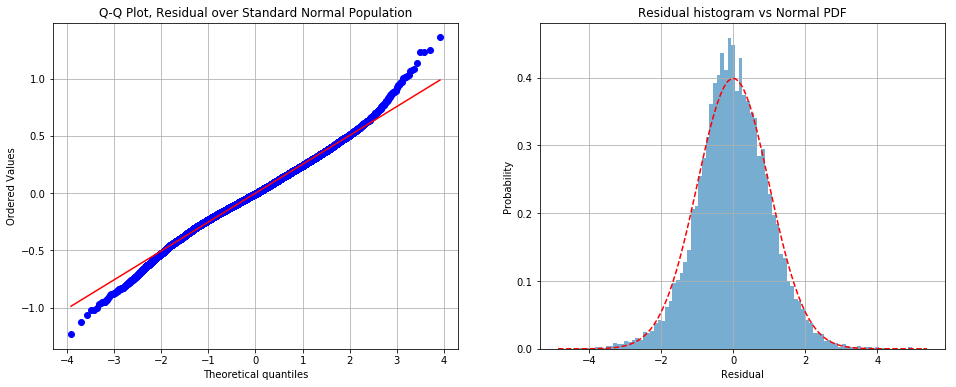

In [24]:
n_bins = 100
res = yhat_train - y_train.values

f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(16, 6)
stats.probplot(res, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot, Residual over Standard Normal Population")
ax1.grid(True)

_, bins, _ = ax2.hist((res - res.mean())/res.std(), n_bins, normed=True, alpha=0.6)
pdf = mlab.normpdf(bins, 0, 1)
ax2.plot(bins, pdf, 'r--')
ax2.set_title("Residual histogram vs Normal PDF")
ax2.set_xlabel("Residual")
ax2.set_ylabel("Probability")
ax2.grid(True)

plt.show()

Se observa que la media es $\mu = 0$  y, a pesar de presentar cambios de densidad en los datos extremos, es razonable asumir normalidad de los residuos. Como la pendiente de la recta es menor a 1, la muestra es menos densa que la poblacion normal estandar para los cuantiles centrales (donde los residuos se encuentran sobre la recta), pero cambia en los extremos, donde la pendiente se acerca a 1. Se puede concluir que $\varepsilon \sim \mathcal{N}(0,\sigma^2)$, donde $\sigma^2 < 1$ .

#### h) Distribuciones

La muestra A toma 3000 valores aleatorios del dataset, mientras que la muestra B modifica las etiquetas del dataset, y luego toma 3000 valores aleatorios del dataset modificado. Como la distribución de las etiquetas cambia en B (posiblemente deja de ser normal), se espera que el desempeño del estimador disminuya.

In [25]:
df_A = df.sample(3000)
frames = []
valor = np.log(df.price)
for z in np.arange(int(np.min(valor)), int(np.max(valor))+1, 0.5):
    frames.append(df[(np.log(df.price) >= z) & (np.log(df.price) < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = np.log(df_A.price)
X_B = df_B.iloc[:,1:].values
y_B = np.log(df_B.price)
Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)
print(Xtrain_A.shape, Xval_A.shape, ytrain_A.shape, yval_A.shape)
print(Xtrain_B.shape, Xval_B.shape, ytrain_B.shape, yval_B.shape)

(2100, 17) (900, 17) (2100,) (900,)
(2100, 17) (900, 17) (2100,) (900,)


Se dividen las muestras en conjuntos de entrenamiento y pruebas. A continuación, se normaliza y entrenan los modelos.

In [29]:
scaler_A = StandardScaler().fit(Xtrain_A)
scaler_B = StandardScaler().fit(Xtrain_B)
scaled_train_A = np.column_stack((scaler_A.transform(Xtrain_A), np.ones(Xtrain_A.shape[0])))
scaled_train_B = np.column_stack((scaler_B.transform(Xtrain_B), np.ones(Xtrain_B.shape[0])))
scaled_test_A = np.column_stack((scaler_A.transform(Xval_A), np.ones(Xval_A.shape[0])))
scaled_test_B = np.column_stack((scaler_B.transform(Xval_B), np.ones(Xval_B.shape[0])))
linreg_A = lm.LinearRegression(fit_intercept=False)
linreg_A.fit(scaled_train_A, ytrain_A.values)
linreg_B = lm.LinearRegression(fit_intercept=False)
linreg_B.fit(scaled_train_B, ytrain_B.values)

y_hat_A = linreg_A.predict(scaled_train_A)
y_hat_B = linreg_B.predict(scaled_train_B)
res_A = y_hat_A - ytrain_A.values
res_B = y_hat_B - ytrain_B.values

print("MSE Train Set A = ", np.mean(np.power(res_A, 2)))
print("MSE Train Set B = ", np.mean(np.power(res_B, 2)))

MSE Train Set A =  0.0630445528073
MSE Train Set B =  0.10393913914


In [30]:
y_hat_test_A = linreg_A.predict(scaled_test_A)
y_hat_test_B = linreg_B.predict(scaled_test_B)
res_test_A = y_hat_test_A - yval_A.values
res_test_B = y_hat_test_B - yval_B.values

print("MSE Test Set A = ", np.mean(np.power(res_test_A, 2)))
print("MSE Test Set B = ", np.mean(np.power(res_test_B, 2)))

MSE Test Set A =  0.0690471103605
MSE Test Set B =  0.0946106744466


Como se esperaba, el desempeño disminuye para la muestra B, con un aumento en el error de un 60.65%. A continuación se estudian las muestras, utilizando histogramas y gráficos Q-Q.

In [18]:
stats.describe(ytrain_A)

DescribeResult(nobs=2100, minmax=(11.302204433654575, 15.126542434583618), mean=13.024679809117371, variance=0.2625133635269834, skewness=0.4202353060690506, kurtosis=0.605984981821531)

In [19]:
stats.describe(ytrain_B)

DescribeResult(nobs=2100, minmax=(11.225243392518447, 15.856730886823913), mean=13.212792970825832, variance=0.7569308471018491, skewness=0.07900316858199458, kurtosis=-0.8328283834599697)

La diferencia más importante es la varianza, que aumenta considerablemente en la muestra B, en relación al cambio en las otras métricas. Se sabe que la muestra A debe estar distribuida normalmente (o parecido), pero no se puede decir lo mismo de B. 

#### Histogramas

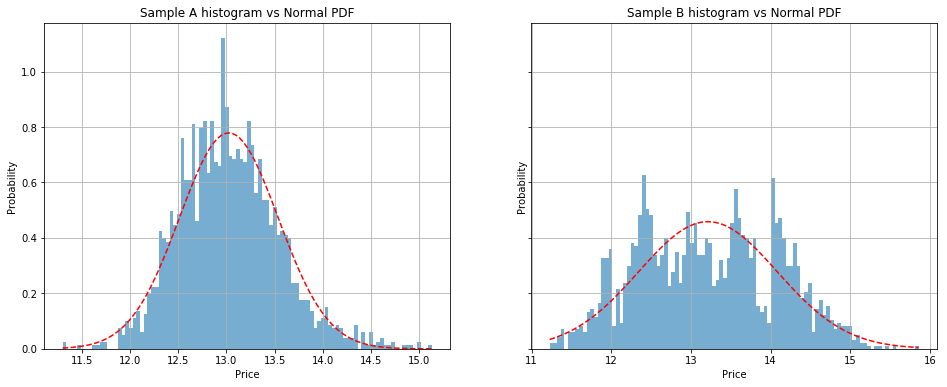

In [20]:
n_bins = 100

f, axarr = plt.subplots(1,2, sharey=True)
f.set_size_inches(16,6)

_, bins, _ = axarr[0].hist(ytrain_A.values, n_bins, normed=True, alpha=0.6)
pdf = mlab.normpdf(bins, ytrain_A.values.mean(), ytrain_A.values.std())
axarr[0].plot(bins, pdf, 'r--')
axarr[0].set_title("Sample A histogram vs Normal PDF")
axarr[0].set_xlabel("Price")
axarr[0].set_ylabel("Probability")
axarr[0].grid(True)

_, bins, _ = axarr[1].hist(ytrain_B.values, n_bins, normed=True, alpha=0.6)
pdf = mlab.normpdf(bins, ytrain_B.values.mean(), ytrain_B.values.std())
axarr[1].plot(bins, pdf, 'r--')
axarr[1].set_title("Sample B histogram vs Normal PDF")
axarr[1].set_xlabel("Price")
axarr[1].set_ylabel("Probability")
axarr[1].grid(True)

plt.show()

Se observa que la muestra B es menos densa cerca de la media, donde la normal es generalmente más densa. Parece tener dos máximos locales, uno cerca de $y = 12.5$ y el otro en $y = 14$, por lo que puede seguir una distribucion multimodal.

#### Q-Q Etiquetas

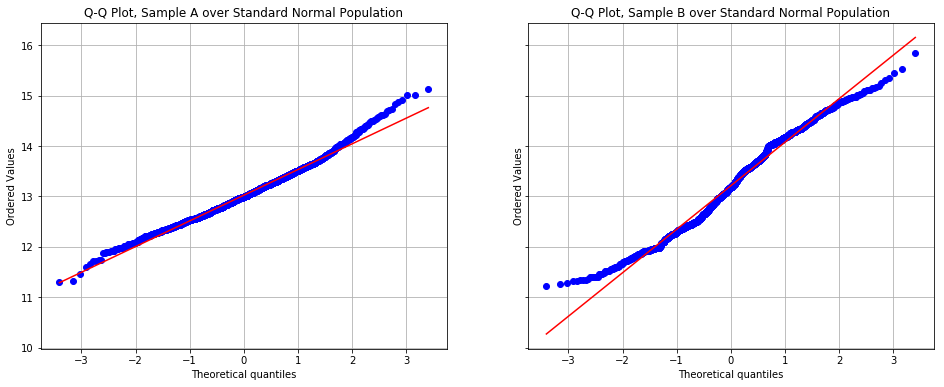

In [21]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
f.set_size_inches(16, 6)
stats.probplot(ytrain_A.values, dist="norm", plot=ax1)
stats.probplot(ytrain_B.values, dist="norm", plot=ax2)
ax1.set_title("Q-Q Plot, Sample A over Standard Normal Population")
ax2.set_title("Q-Q Plot, Sample B over Standard Normal Population")
ax1.grid(True)
ax2.grid(True)
plt.show()

Como aparece en el enunciado, las etiquetas de la muestra B no siguen la misma distribución de A, pero tampoco es muy distinta. Se observa que las medias son similares, y que A es menos dispersa que B, porr la pendiente de la recta. Ambas tienen cambios de densidad en los valores extremos y el punto de inflexión en la muestra B sugiere una distribución bimodal.

#### Q-Q Residuos

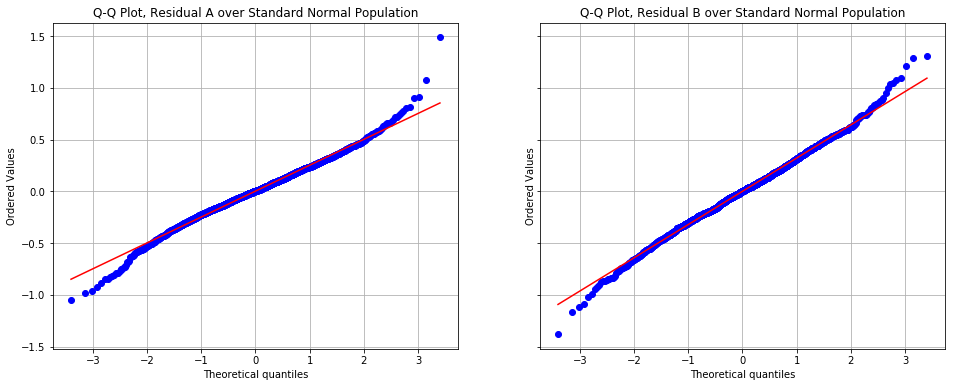

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
f.set_size_inches(16, 6)
stats.probplot(res_A, dist="norm", plot=ax1)
stats.probplot(res_B, dist="norm", plot=ax2)
ax1.set_title("Q-Q Plot, Residual A over Standard Normal Population")
ax2.set_title("Q-Q Plot, Residual B over Standard Normal Population")
ax1.grid(True)
ax2.grid(True)
plt.show()

A pesar de que B no se distribuye normalmente, los residuos si lo hacen, lo que explica que el modelo obtenga resultados aceptables, peores que para la muestra A, pero aún así con un error bajo.

Como se sugirió anteriormente, la muestra B puede seguir una distribución bimodal, como la suma de dos gaussianas.

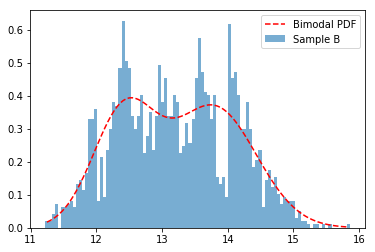

In [45]:
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

f, ax = plt.subplots()
y, x, _ = ax.hist(ytrain_B.values, 100, normed=True, alpha=0.6, label="Sample B")
x=(x[1:]+x[:-1])/2

from scipy.optimize import curve_fit
params, cov = curve_fit(bimodal, x, y, (12.5,0.2,250,14,0.2,125))
sigma = np.sqrt(np.diag(cov))
ax.plot(x, bimodal(x, *params), 'r--', label="Bimodal PDF")
ax.legend()
plt.show()

In [46]:
pparams = pd.DataFrame(data={'Params':params,'Covariance':sigma},index=bimodal.__code__.co_varnames[1:])
pparams

,Covariance,Params
mu1,0.108842,12.421558
sigma1,0.078964,0.477384
A1,0.051063,0.348727
mu2,0.141264,13.789225
sigma2,0.110648,0.644115
A2,0.027478,0.365829


Los parámetros de la distribución bimodal coinciden con lo que se observo anteriormente, con máximos locales cerca de 12.5 y 14.

## 2) Selección de Atributos

Se utiliza el mismo dataset de la sección anterior. El algoritmo a utilizar es el Forward Step-wise Selection (FSS). En su primera versión, es de tipo <em>wrapper</em>, ya que se entrena el modelo en cada iteración, con el fin de medir el error de predicción (MSE).

In [62]:
def fss(x, y, names_x, k=10000):
    p = x.shape[1]-1
    k = min(p, k)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected)<=k:
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print("selected = %s ..."%names_x[best_candidate])
        #print("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    selected.sort()
    return selected

La segunda versión es de tipo <em>filter</em>, ya que no se entrena el modelo, si no que se utilizan otras métricas, de cómputo rápido, en reemplazo del error de predicción. En específico, se utilizará <em>Correlation Feature Selection</em> (CFS), que evalúa un subconjunto de atributos bajo el siguiente criterio: "Buenos subconjuntos de atributos contienen atributos altamente correlacionados con el regresor, pero no correlacionado entre ellos".

El coeficiente de correlación usado es el de Pearson, y la métrica a maximizar es:

<center>$CFS = max \left[\frac{r_{cf_1}+r_{cf_2}+...+r_{cf_k}}{\sqrt{k+2\left( r_{f_1f_2}+...+r_{f_if_j}+...+r_{f_1f_k} \right)}} \right]$</center>

donde $r_{cf_i}$ es la correlación entre las etiquetas y el atributo $i$, y $r_{f_if_j}$ es la correlación entre el atributo $i$ y el atributo $j$.

In [65]:
def get_comb(indexes):
    if len(indexes) == 1:
        return tuple(zip(*[indexes + indexes]))
    combs = []
    for i in range(0, len(indexes)-1):
        for j in range(i+1, len(indexes)):
            combs.append([indexes[i],indexes[j]])
    return tuple(zip(*combs))
    
def fss_cfs(x, y, names_x, k=10000):
    p = x.shape[1]-1
    k = min(p, k)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    corr = np.corrcoef(np.column_stack((x[:,:-1], y)).T)
    while remaining and len(selected)<=k:
        score_candidates = []
        for candidate in remaining:
            indexes = selected[1:] + [candidate]
            merit = np.sum(corr[-1,indexes])/np.sqrt(k+2*np.sum(corr[get_comb(indexes)]))
            score_candidates.append((merit, candidate))
        score_candidates.sort()
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        #print("selected = %s ..."%names_x[best_candidate])
        #print("totalvars=%d, merit = %f"%(len(indexes),best_new_score))
    selected.sort()
    return selected

#### Comparación

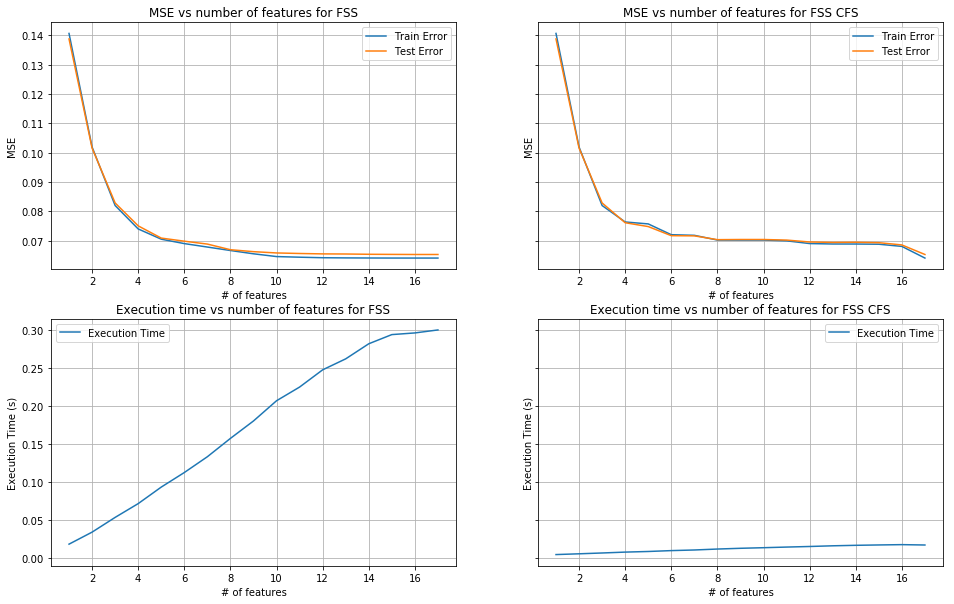

In [66]:
names_regressors = np.array(["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat","long",
"sqft_living15","sqft_lot15","intercept"])

Xm_train = scaled_x_train.as_matrix()
ym_train = y_train.as_matrix()
Xm_test = scaled_x_test.as_matrix()
ym_test = y_test.as_matrix()

f, axes = plt.subplots(2,2, sharey="row")
f.set_size_inches(16,10)
x = np.arange(1, len(names_regressors))
y_fss = []

for i in x:
    start_time = time.time()
    features = fss(Xm_train, ym_train, names_regressors, k=i)
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm_train[:,features], ym_train)
    train_predict = linreg.predict(Xm_train[:,features])
    test_predict = linreg.predict(Xm_test[:,features])
    err_train = np.mean(np.power(train_predict - ym_train, 2))
    err_test = np.mean(np.power(test_predict - ym_test,2))
    y_fss.append([err_train, err_test, time.time() - start_time])
axes[0,0].set_xlabel("# of features")
axes[0,0].set_ylabel("MSE")
axes[0,0].set_title("MSE vs number of features for FSS")
axes[0,0].grid(True)
axes[0,0].plot(x, np.array(y_fss)[:,0], label="Train Error")
axes[0,0].plot(x, np.array(y_fss)[:,1], label="Test Error")
axes[0,0].legend()
axes[1,0].set_xlabel("# of features")
axes[1,0].set_ylabel("Execution Time (s)")
axes[1,0].set_title("Execution time vs number of features for FSS")
axes[1,0].grid(True)
axes[1,0].plot(x, np.array(y_fss)[:,2], label="Execution Time")
axes[1,0].legend()

y_cfs = []
for i in x:
    start_time = time.time()
    features = fss_cfs(Xm_train, ym_train, names_regressors, k=i)
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm_train[:,features], ym_train)
    train_predict = linreg.predict(Xm_train[:,features])
    test_predict = linreg.predict(Xm_test[:,features])
    err_train = np.mean(np.power(train_predict - ym_train, 2))
    err_test = np.mean(np.power(test_predict - ym_test,2))
    y_cfs.append([err_train, err_test, time.time() - start_time])
axes[0,1].set_xlabel("# of features")
axes[0,1].set_ylabel("MSE")
axes[0,1].set_title("MSE vs number of features for FSS CFS")
axes[0,1].grid(True)
axes[0,1].plot(x, np.array(y_cfs)[:,0], label="Train Error")
axes[0,1].plot(x, np.array(y_cfs)[:,1], label="Test Error")
axes[0,1].legend()
axes[1,1].set_xlabel("# of features")
axes[1,1].set_ylabel("Execution Time (s)")
axes[1,1].set_title("Execution time vs number of features for FSS CFS")
axes[1,1].grid(True)
axes[1,1].plot(x, np.array(y_cfs)[:,2], label="Execution Time")
axes[1,1].legend()

Se puede observar que el FSS <em>wrapper</em> es capaz de encontrar un subconjunto de 6 atributos que tiene el mismo MSE que el FSS <em>filter</em> de 8 hasta 14 atributos. Esto se debe a que el primero considera el modelo al momento de seleccionar los atributos, por lo que el resultado es un subconjunto que funciona bien para un modelo en específico, pero podría no ser bueno para otro modelo. En cambio, el CFS solo considera las características de los datos para generar subconjuntos, por lo que debiesen ser más generales, y tener buen desempeño con distintos modelos. Otra diferencia notable, es el tiempo de ejecución considerablemente menor del CFS, al no tener que entrenar el modelo en cada iteración. Finalmente, existe un <em>trade off</em> entre calidad del subconjunto de atributos, y el costo computacional de obtenerlo.  

## 3) Regularización

#### a) Ridge

El primer modelo es Ridge Regression, que usa la norma L2 como regularizador, y permite reducir los coeficientes hacia cero. Se construye un gráfico de los valores que toman los coeficientes en base al parámetro <em>alpha</em> de Ridge.

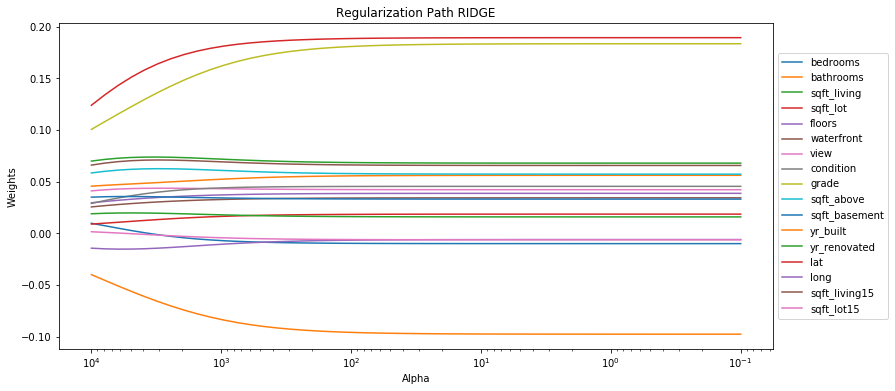

In [76]:
Dtrain = scaled_x_train.copy()
Dtrain = Dtrain.drop('intercept', axis=1)
names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat","long",
"sqft_living15","sqft_lot15"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')

f, ax = plt.subplots()
f.set_size_inches(16,6)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print(alphas_.shape)
    #print(y_arr.shape)
    ax.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
ax.set_xlabel('Alpha')
ax.set_ylabel('Weights')
ax.set_title('Regularization Path RIDGE')
ax.axis('tight')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa que a mayor valor de alpha, mayor es el encogimiento de los coeficientes, pero ninguno logra hacerse cero. Los coeficientes de mayor valor reciben una penalización mayor, lo que es natural ya que el regularizador es el cuadrado del coeficiente.

#### b) Lasso

El segundo modelo utiliza la norma L1 como regularizador, es decir, el valor absoluto de los coeficientes. Se construye el mismo gráfico que en la sección anterior.

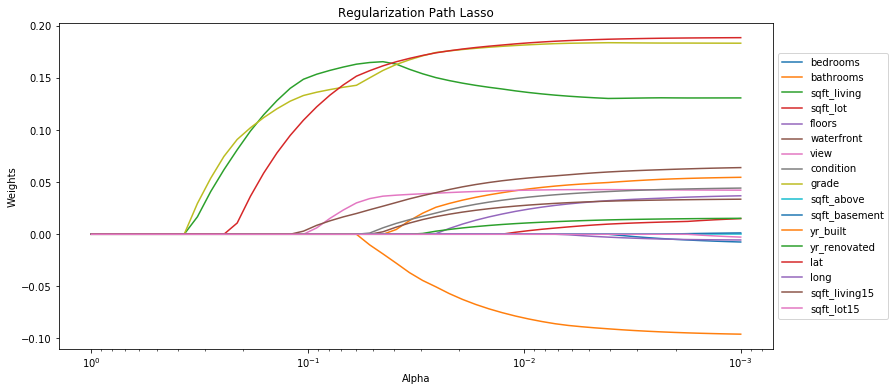

In [77]:
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)

f, ax = plt.subplots()
f.set_size_inches(16,6)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print(alphas_.shape)
    #print(y_arr.shape)
    ax.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
ax.set_xlabel('Alpha')
ax.set_ylabel('Weights')
ax.set_title('Regularization Path Lasso')
ax.axis('tight')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Se observa que Lasso si es capaz de seleccionar atributos, ya que para valor de alpha lo suficientemente grandes, los coeficientes que menos aportan se hacen cero. Si bien los coeficientes de mayor valor sufre una penalización mayor, no es tan notorio como en Ridge.

#### c) Ridge MSE

El siguiente gráfico muestra como el valor de alpha en Ridge Regression afecta el desempeño del estimador, en base a MSE.

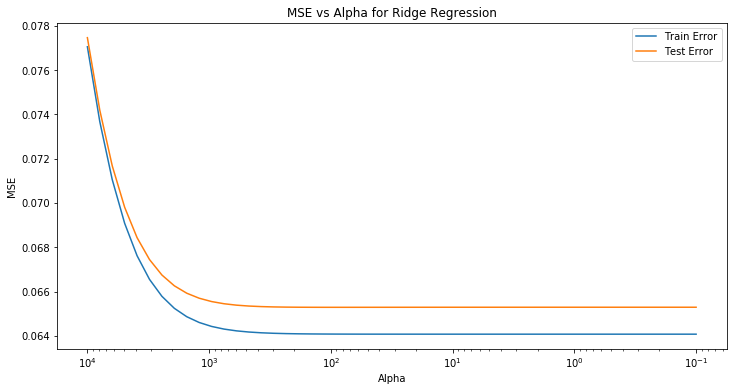

In [89]:
Xtest = scaled_x_test.copy()
ytest = y_test.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, y_train)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
f, ax = plt.subplots()
f.set_size_inches(12,6)
ax = plt.gca()
ax.plot(alphas_, mse_train, label='Train Error')
ax.plot(alphas_, mse_test, label='Test Error')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs Alpha for Ridge Regression")
ax.legend()
plt.show()

El error converge al error de mínimos cuadrados, por lo que no hay una mejora en el desempeño. Se observa que para valores de alpha menores a $10^2$ el error ya es comparable al de mínimos cuadrados, lo que coincide con el gráfico de a), ya que los coeficientes dejan de encogerse para dichos valores de alpha.

#### d) Lasso MSE

Se construye el mismo gráfico anterior pero usando Lasso.

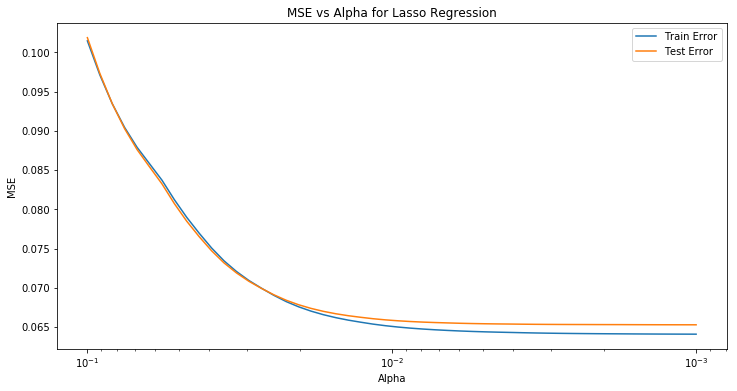

In [88]:
Xtest = scaled_x_test.copy()
ytest = y_test.copy()
Xtest = Xtest.drop('intercept', axis=1)
alphas_ = np.logspace(-1,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Dtrain, y_train)
    yhat_train = model.predict(Dtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
f, ax = plt.subplots()
f.set_size_inches(12,6)
ax = plt.gca()
ax.plot(alphas_, mse_train, label='Train Error')
ax.plot(alphas_, mse_test, label='Test Error')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE vs Alpha for Lasso Regression")
ax.legend()
plt.show()

Lasso también converge al error de mínimos cuadrados, la diferencia es que para los valores de alpha que logran tal error, aún existen atributos con coeficientes cero, por lo que Lasso logra un desempeño similar a mínimos cuadrados, usando menos atributos.

#### e) Validación cruzada de alpha

Se desea encontrar el valor de alpha que minimice el error cuadrático medio sobre el conjunto de pruebas, para lo que se usa validación cruzada 10-fold.

In [97]:
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = X_train.as_matrix()
ym = y_train.as_matrix()

alphas_ = np.logspace(-1,-3,base=10)

from sklearn import cross_validation
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
mse_list_k10 = []
for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
        columns=X_train.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]),
        columns=X_train.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept',
        np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train,
        ym[train]).predict(df_cross_test),ym[vald]))
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
print("LASSO Best Alpha=" + str(best_alpha) + ", MSE(CV)=" + str(best_cv_mse))

LASSO Best Alpha=0.001, MSE(CV)=0.0704280768512


In [98]:
MSE = lambda y,yhat: np.mean(np.power(y-yhat,2))
Xm = X_train.as_matrix()
ym = y_train.as_matrix()

alphas_ = np.logspace(4, -1,base=10)

from sklearn import cross_validation
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True)
mse_list_k10 = []
for a in alphas_:
    model.set_params(alpha=a)
    for train,vald in k_fold:
        cross_scaler = StandardScaler().fit(Xm[train])
        df_cross_train = pd.DataFrame(cross_scaler.transform(Xm[train]),
        columns=X_train.columns)
        df_cross_train.insert(df_cross_train.shape[1], 'intercept',
        np.ones(df_cross_train.shape[0]))
        df_cross_test = pd.DataFrame(cross_scaler.transform(Xm[vald]),
        columns=X_train.columns)
        df_cross_test.insert(df_cross_test.shape[1], 'intercept',
        np.ones(df_cross_test.shape[0]))
        mse_list_k10.append(MSE(model.fit(df_cross_train,
        ym[train]).predict(df_cross_test),ym[vald]))
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
print("RIDGE Best Alpha=" + str(best_alpha) + ", MSE(CV)=" + str(best_cv_mse))

RIDGE Best Alpha=0.1, MSE(CV)=0.065332612528


## 4) Predicción de Utilidades de Películas

Para esta sección se utilizará un dataset distinto. El paper original (citado en el enunciado) busca predecir las utilidades de un conjunto de películas, en base a metadatos, reseñas de expertos previo al estreno, y un conjunto de ambos. La idea es estudiar si las reseñas pueden reemplazar o suplementar los metadatos al momento de predecir. Las reseñas se codifican en n-gramas, y los atributos finales de cada película son la frecuencia de cada n-grama. El dataset provisto no contiene los metadatos, por lo que los atributos corresponden exclusivamente a la frecuencia de los n-gramas, es decir, se debe predecir las utilidades de una película solo en base a las reseñas previas a su estreno.

In [5]:
from scipy.sparse import csr_matrix, hstack, vstack
from scipy.io import mmread
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import ElasticNet, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

Debido a que la frecuencia de muchos n-gramas es cero en la mayoría de las entradas, la matriz de datos es sparse. Para su correcto tratamiento, se utilizan las estructuras provistas por Scipy para manipular matrices sparse.

Contamos con dos datasets, ambos indican la frecuencia de los n-gramas en sus atributos y la utilidad en las etiquetas, pero la forma en que se agruparon los n-gramas es distinta. Podríamos decir que en el preprocesamiento del dataset, se extraen dos conjuntos de atributos distintos, que corresponden a los datasets que tenemos a disposición.

In [3]:
Xa_train = csr_matrix(mmread("a/train.x.mm"))
ya_train = np.loadtxt("a/train.y.dat")
Xa_val = csr_matrix(mmread("a/dev.x.mm"))
ya_val = np.loadtxt("a/dev.y.dat")
Xa_test = csr_matrix(mmread("a/test.x.mm"))
ya_test = np.loadtxt("a/test.y.dat")

Xb_train = csr_matrix(mmread("b/train.x.mm"))
yb_train = np.loadtxt("b/train.y.dat")
Xb_val = csr_matrix(mmread("b/dev.x.mm"))
yb_val = np.loadtxt("b/dev.y.dat")
Xb_test = csr_matrix(mmread("b/test.x.mm"))
yb_test = np.loadtxt("b/test.y.dat")

#### OLS

En el caso base, se utiliza regresión linear por mínimos cuadrados. Se presenta el resultado para ambos datasets.

In [8]:
model1a = lm.LinearRegression().fit(Xa_train, ya_train)
print("Train Score = ", model1a.score(Xa_train, ya_train))
print("Test Score = ", model1a.score(Xa_test, ya_test))

Train Score =  0.999999998881
Test Score =  0.55640701102


In [5]:
model1b = lm.LinearRegression().fit(Xb_train, yb_train)
print("Train Score = ", model1b.score(Xb_train, yb_train))
print("Test Score = ", model1b.score(Xb_test, yb_test))

Train Score =  0.999999998909
Test Score =  0.182067994071


Se observa que para ambos datasets existe overfitting, pero el desempeño en el dataset b es mucho menor al a.

#### Ridge

Se utiliza RidgeCV de Sklearn para aplicar Ridge Regression, cuyo alpha ha sido validado usando validación cruzada de 5 folds.

In [9]:
model2a = RidgeCV(alphas=np.logspace(4,-1, base=10)).fit(Xa_train, ya_train)
print("Train Score = ", model2a.score(Xa_train, ya_train))
print("Test Score = ", model2a.score(Xa_test, ya_test))

Train Score =  0.987870792282
Test Score =  0.560010823039


In [7]:
model2b = RidgeCV(alphas=np.logspace(4,-1, base=10)).fit(Xb_train, yb_train)
print("Train Score = ", model2b.score(Xb_train, yb_train))
print("Test Score = ", model2b.score(Xb_test, yb_test))

Train Score =  0.867111399497
Test Score =  0.234380846151


El desempeño mejora, pero se sigue observando overfitting.

#### Lasso

De igual forma que RidgeCV, se usa LassoCv para estimar usando Lasso con alpha validado.

In [10]:
model3a = LassoCV(alphas=np.logspace(-1,-3, base=10), n_jobs=-1).fit(Xa_train, ya_train)
print("Train Score = ", model3a.score(Xa_train, ya_train))
print("Test Score = ", model3a.score(Xa_test, ya_test))

Train Score =  1.0
Test Score =  -0.0209150329435


Lasso presenta overfitting extremo. Es posible que los valores de alpha, en conjunto con que la matriz X sea sparse, afecte la estabilidad numérica del algoritmo.

#### Truncated SVD - Feature Extraction

Se utiliza Truncated SVD, que es similar a PCA pero sin centrar la matriz, para extraer los 100 primeros componentes, y entrenar el modelo lineal con ese nuevo conjunto de atributos.

In [26]:
svda = TruncatedSVD(n_components=100).fit(Xa_train)
Xa_train_red = svda.transform(Xa_train)

model2a = lm.LinearRegression(fit_intercept=True).fit(Xa_train_red, ya_train)
print("Train Score = ", model2a.score(svda.transform(Xa_train), ya_train))
print("Test Score = ", model2a.score(svda.transform(Xa_test), ya_test))

Train Score =  0.7050059672
Test Score =  0.563660597432


In [27]:
svdb = TruncatedSVD(n_components=100).fit(Xb_train)
Xb_train_red = svdb.transform(Xb_train)

model2b = lm.LinearRegression(fit_intercept=True).fit(Xb_train_red, yb_train)
print("Train Score = ", model2b.score(svdb.transform(Xb_train), yb_train))
print("Test Score = ", model2b.score(svdb.transform(Xb_test), yb_test))

Train Score =  0.400939328505
Test Score =  0.266717999224


Se observan mejoras, pero el objetivo es lograr un score de al menos 0.75. El problema no es con los modelos, si no con los datos. Las etiquetas se distribuyen exponencialmente, por lo que se debe usar el logaritmo de las etiquetas en el entrenamiento, de modo que se distribuyan de forma log-normal.

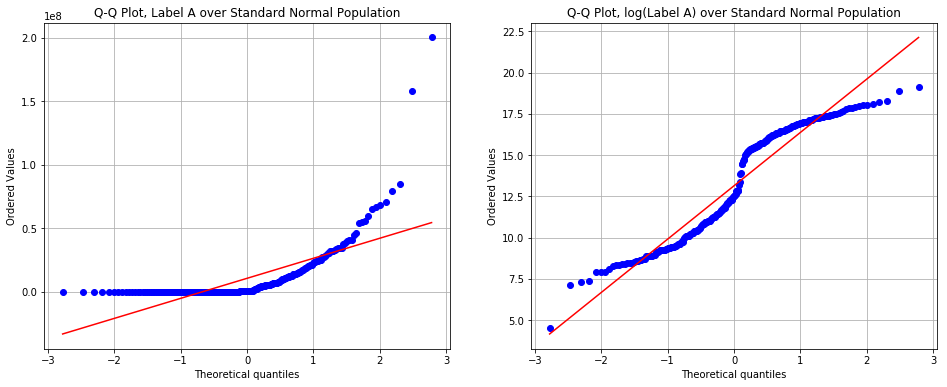

In [15]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(16, 6)
stats.probplot(ya_test, dist=stats.norm, plot=ax1)
stats.probplot(np.log(ya_test), dist=stats.norm, plot=ax2)
ax1.set_title("Q-Q Plot, Label A over Standard Normal Population")
ax2.set_title("Q-Q Plot, log(Label A) over Standard Normal Population")
ax1.grid(True)
ax2.grid(True)
plt.show()

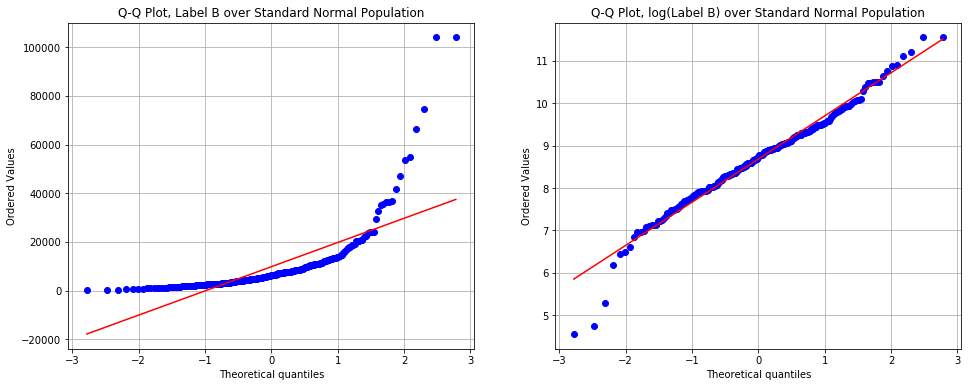

In [16]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches(16, 6)
stats.probplot(yb_test, dist=stats.norm, plot=ax1)
stats.probplot(np.log(yb_test), dist=stats.norm, plot=ax2)
ax1.set_title("Q-Q Plot, Label B over Standard Normal Population")
ax2.set_title("Q-Q Plot, log(Label B) over Standard Normal Population")
ax1.grid(True)
ax2.grid(True)
plt.show()

Es claro que sin aplicar logaritmo, las etiquetas siguen una distribución exponencial. OLS asume que las etiquetas se distribuyen de forma normal, por lo que es natural que antes de aplicar logaritmo, no se obtuvieran buenos resultados.

#### OLS

Se repiten los modelos para las nuevas etiquetas.

In [12]:
model4a = lm.LinearRegression().fit(Xa_train, np.log(ya_train))
print("Train Score = ", model4a.score(Xa_train, np.log(ya_train)))
print("Test Score = ", model4a.score(Xa_test, np.log(ya_test)))

Train Score =  0.999999998424
Test Score =  0.710517680618


In [11]:
model4b = lm.LinearRegression().fit(Xb_train, np.log(yb_train))
print("Train Score = ", model4b.score(Xb_train, np.log(yb_train)))
print("Test Score = ", model4b.score(Xb_test, np.log(yb_test)))

Train Score =  0.999999997087
Test Score =  0.0211240298965


Efectivamente se obtienen mejores resultados para el dataset A, pero para B no es el caso.

#### Ridge

In [12]:
model5a = RidgeCV(alphas=np.logspace(4,-1, base=10)).fit(Xa_train, np.log(ya_train))
print("Train Score = ", model5a.score(Xa_train, np.log(ya_train)))
print("Test Score = ", model5a.score(Xa_test, np.log(ya_test)))

Train Score =  0.919445969222
Test Score =  0.779190158504


In [13]:
model5b = RidgeCV(alphas=np.logspace(4,-1, base=10)).fit(Xb_train, np.log(yb_train))
print("Train Score = ", model5b.score(Xb_train, np.log(yb_train)))
print("Test Score = ", model5b.score(Xb_test, np.log(yb_test)))

Train Score =  0.740886463978
Test Score =  0.254480693607


Nuevamente se observa una mejora en el desempeño, y se logra superar el 0.75 mínimo para el dataset A. También se observa que disminuye el overfitting en ambos casos, siendo la disminución mayor para B.

#### Lasso

In [18]:
model6a = ElasticNet(alpha=0.1, l1_ratio=1.0).fit(Xa_train, np.log(ya_train))
print("Train Score = ", model6a.score(Xa_train, np.log(ya_train)))
print("Test Score = ", model6a.score(Xa_test, np.log(ya_test)))

Train Score =  0.876895263931
Test Score =  0.83284562958


In [20]:
model6b = ElasticNet(alpha=0.1).fit(Xb_train, np.log(yb_train))
print("Train Score = ", model6b.score(Xb_train, np.log(yb_train)))
print("Test Score = ", model6b.score(Xb_test, np.log(yb_test)))

Train Score =  0.480600448102
Test Score =  0.293298613471


/home/diego/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso obtiene los mejores resultados para ambos datsets. El overfitting se reduce considerablemente, aunque aun está presente.

#### Truncated SVD

In [37]:
svda = TruncatedSVD(n_components=100).fit(Xa_train)
Xa_train_red = svda.transform(Xa_train)

model7a = lm.LinearRegression().fit(Xa_train_red, np.log(ya_train))
print("Train Score = ", model7a.score(svda.transform(Xa_train), np.log(ya_train)))
print("Test Score = ", model7a.score(svda.transform(Xa_test), np.log(ya_test)))

Train Score =  0.873433589772
Test Score =  0.836031678639


In [38]:
svdb = TruncatedSVD(n_components=100).fit(Xb_train)
Xb_train_red = svdb.transform(Xb_train)

model7b = lm.LinearRegression().fit(Xb_train_red, np.log(yb_train))
print("Train Score = ", model7b.score(svdb.transform(Xb_train), np.log(yb_train)))
print("Test Score = ", model7b.score(svdb.transform(Xb_test), np.log(yb_test)))

Train Score =  0.372295454765
Test Score =  0.311770102733


Finalmente, se obtiene los mejores resultados con extracción de características, usando los 100 componentes principales. El overfitting deja de ser factor en este modelo.